In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape


(404290, 6)

In [4]:
df=df.dropna()
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

0    255024
1    149263
Name: is_duplicate, dtype: int64
0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64


<AxesSubplot:>

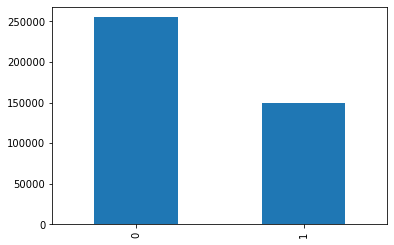

In [5]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [6]:

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537929
Number of questions getting repeated 111778


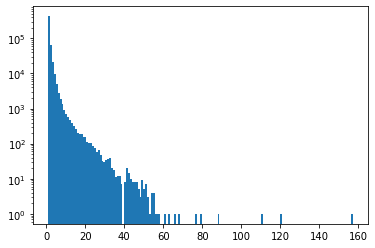

In [7]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# Feature Engineering Starts

### -> q1 length 
### -> q2 length 
### -> words in q1
### -> words in q2
### -> words common 
### -> Word total 
### -> word part in each

In [8]:
df['q1_length']= df['question1'].str.len()
df['q2_length']= df['question2'].str.len()


In [9]:
df['q1_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [10]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7


In [11]:
def common_word(row):
    w1 = set(map(lambda words: words.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda words: words.lower().strip(),row['question1'].split(" ")))
    return len(w1 & w2)


In [12]:
df['word_common']=df.apply(common_word, axis=1)

--------------------------------------------------------------

In [15]:
def total_word(row):
    w1 = set(map(lambda words: words.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda words: words.lower().strip(),row['question1'].split(" ")))
    return len(w1) + len(w2)

In [16]:
df['total_word']=df.apply(total_word,axis=1)

In [17]:
df['word_ratio']=round(df['word_common']/df['total_word'],2)

In [19]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words,word_common,total_word,word_ratio
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,12,24,0.5
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,8,16,0.5
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,14,28,0.5
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,10,20,0.5
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,13,26,0.5


# Feature Correction=>    Checking outliers and droping


minimum characters 1
maximum characters 623
average num of characters 59


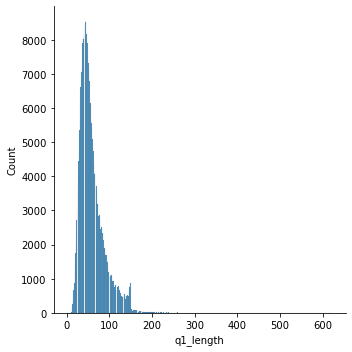

In [22]:
sns.displot(df['q1_length'])
print('minimum characters',df['q1_length'].min())
print('maximum characters',df['q1_length'].max())
print('average num of characters',int(df['q1_length'].mean()))

minimum words 1
maximum words 125
average num of words 10


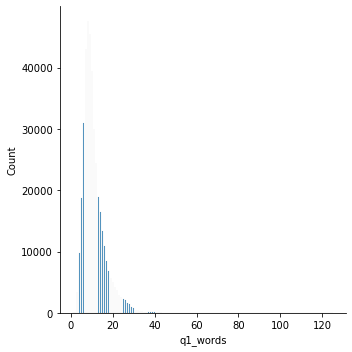

In [23]:
sns.displot(df['q1_words'])
print('minimum words',df['q1_words'].min())
print('maximum words',df['q1_words'].max())
print('average num of words',int(df['q1_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


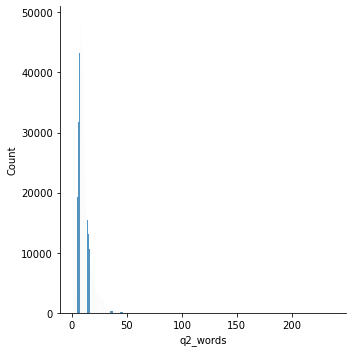

In [24]:
sns.displot(df['q2_words'])
print('minimum words',df['q2_words'].min())
print('maximum words',df['q2_words'].max())
print('average num of words',int(df['q2_words'].mean()))

/home/btech/harshit.singh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/btech/harshit.singh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


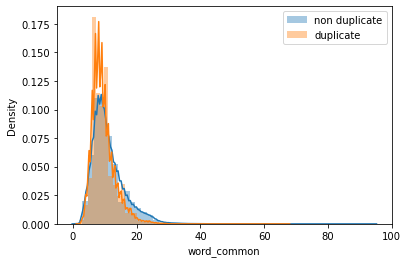

In [25]:
# common words
sns.distplot(df[df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

/home/btech/harshit.singh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/btech/harshit.singh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


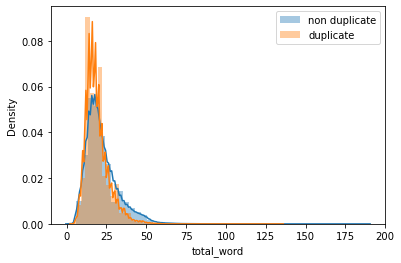

In [26]:
# total words
sns.distplot(df[df['is_duplicate'] == 0]['total_word'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['total_word'],label='duplicate')
plt.legend()
plt.show()

/home/btech/harshit.singh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/btech/harshit.singh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/btech/harshit.singh/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/hom

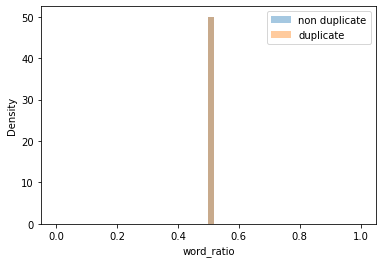

In [27]:
# word share
sns.distplot(df[df['is_duplicate'] == 0]['word_ratio'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_ratio'],label='duplicate')
plt.legend()
plt.show()

In [28]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [29]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(404287, 8)


,is_duplicate,q1_length,q2_length,q1_words,q2_words,word_common,total_word,word_ratio
0,0,66,57,14,12,12,24,0.5
1,0,51,88,8,13,8,16,0.5
2,0,73,59,14,10,14,28,0.5
3,0,50,65,11,9,10,20,0.5
4,0,76,39,13,7,13,26,0.5


## TRAINING

list add with all questions

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)  # features get features
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)     # fit transform the lift --> gives bag of words of quetions 

In [31]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)         # cocat both questions features
temp_df.shape

(404287, 6000)

In [32]:
# mixing of temp and ques and features


In [33]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(404287, 6008)


,is_duplicate,q1_length,q2_length,q1_words,q2_words,word_common,total_word,word_ratio,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,66,57,14,12,12,24,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,51,88,8,13,8,16,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,73,59,14,10,14,28,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,50,65,11,9,10,20,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,76,39,13,7,13,26,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8108906972717603

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7552375769868164